In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
from keras.applications.resnet50 import ResNet50
from keras.layers import Dense,Flatten,GlobalAveragePooling2D,Input,Dropout,Conv2D
from keras.preprocessing import image
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import np_utils

Using TensorFlow backend.
/home/inderpreet/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/inderpreet/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/inderpreet/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/inderpreet/.local/lib/python3.6/site-packages/t

In [2]:
dirs=os.listdir("./data/")
print(dirs)

['horses', 'cats', 'dogs', 'Humans']


In [3]:
path="./data/"

In [4]:
images=[]
labels=[]

In [5]:
label_dict={"horses":0,"cats":1,"dogs":2,"Humans":3}

In [6]:
for ix in dirs:
    class_path=path + ix + "/"
    img_names=os.listdir(class_path)
    for img in img_names:
        img=image.load_img(class_path + img,target_size=(224,224))
        img_array=image.img_to_array(img)
        images.append(img_array)
        labels.append(label_dict[ix])
        
print(len(images),len(labels))

808 808


In [7]:
X_train=np.array(images)
y_train=np.array(labels)
y_train=np_utils.to_categorical(y_train)
print((X_train.shape),(y_train.shape))

(808, 224, 224, 3) (808, 4)


In [8]:
res_model=ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3))

W0722 03:31:14.023237 139758722361152 deprecation_wrapper.py:119] From /home/inderpreet/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0722 03:31:14.399505 139758722361152 deprecation_wrapper.py:119] From /home/inderpreet/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0722 03:31:14.501745 139758722361152 deprecation_wrapper.py:119] From /home/inderpreet/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0722 03:31:14.611886 139758722361152 deprecation_wrapper.py:119] From /home/inderpreet/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1

In [9]:
res_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [10]:
#model1
c1=Conv2D(16,(3,3),activation='relu')(res_model.output)
f1=Flatten()(c1)
fc=Dense(4,activation='softmax')(f1)
model=Model(inputs=res_model.inputs,output=fc)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("de...)`
  """


In [11]:
#Model2
avg=GlobalAveragePooling2D()(res_model.output)
fc1=Dense(512,activation='relu')(avg)
fc2=Dense(4,activation='softmax')(fc1)

model=Model(inputs=res_model.inputs,output=fc2)
model.summary()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("de...)`
  


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [12]:
for ix,layers in enumerate(model.layers):
    print(ix,layers)

0 <keras.engine.input_layer.InputLayer object at 0x7f1b9249ce48>
1 <keras.layers.convolutional.ZeroPadding2D object at 0x7f1b9249ca20>
2 <keras.layers.convolutional.Conv2D object at 0x7f1b92437278>
3 <keras.layers.normalization.BatchNormalization object at 0x7f1b9249ceb8>
4 <keras.layers.core.Activation object at 0x7f1b74b8e400>
5 <keras.layers.convolutional.ZeroPadding2D object at 0x7f1b74b424e0>
6 <keras.layers.pooling.MaxPooling2D object at 0x7f1b74b42c18>
7 <keras.layers.convolutional.Conv2D object at 0x7f1b923b8dd8>
8 <keras.layers.normalization.BatchNormalization object at 0x7f1b7404c908>
9 <keras.layers.core.Activation object at 0x7f1b7404cfd0>
10 <keras.layers.convolutional.Conv2D object at 0x7f1b6c367b70>
11 <keras.layers.normalization.BatchNormalization object at 0x7f1b6c302fd0>
12 <keras.layers.core.Activation object at 0x7f1b6c2c99b0>
13 <keras.layers.convolutional.Conv2D object at 0x7f1b6c21bf60>
14 <keras.layers.convolutional.Conv2D object at 0x7f1b6c1c0860>
15 <keras.lay

In [13]:
for ix in range(170):
    model.layers[ix].trainable=False

In [14]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [15]:
adam=Adam(lr=0.001)

In [17]:
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy']) 


W0722 03:33:47.439718 139758722361152 deprecation_wrapper.py:119] From /home/inderpreet/.local/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [18]:
 history=model.fit(X_train,y_train,epochs=10,batch_size=64,validation_split=0.20)

W0722 03:33:55.325828 139758722361152 deprecation.py:323] From /home/inderpreet/.local/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 646 samples, validate on 162 samples
Epoch 1/10
646/646 [==============================] - 26s 41ms/step - loss: 1.1817 - acc: 0.7028 - val_loss: 0.0122 - val_acc: 0.9938
Epoch 2/10
646/646 [==============================] - 5s 8ms/step - loss: 0.0854 - acc: 0.9737 - val_loss: 0.6975 - val_acc: 0.7963
Epoch 3/10
646/646 [==============================] - 5s 8ms/step - loss: 0.0357 - acc: 0.9876 - val_loss: 0.0738 - val_acc: 0.9753
Epoch 4/10
646/646 [==============================] - 5s 8ms/step - loss: 0.0106 - acc: 0.9985 - val_loss: 0.0053 - val_acc: 1.0000
Epoch 5/10
646/646 [==============================] - 5s 8ms/step - loss: 0.0077 - acc: 0.9985 - val_loss: 0.0099 - val_acc: 1.0000
Epoch 6/10
646/646 [==============================] - 5s 8ms/step - loss: 0.0154 - acc: 0.9969 - val_loss: 0.0473 - val_acc: 0.9753
Epoch 7/10
646/646 [==============================] - 5s 8ms/step - loss: 0.0058 - acc: 0.9985 - val_loss: 0.0157 - val_acc: 0.9938
Epoch 8/10
646/646 [========

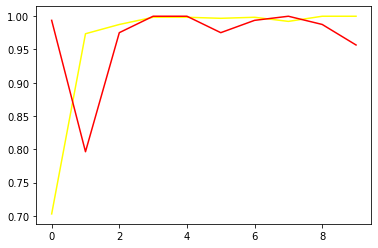

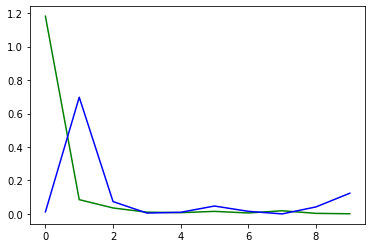

In [19]:

plt.figure(0)
plt.plot(history.history['acc'], color='yellow')
plt.plot(history.history['val_acc'], color='red')

plt.figure(1)
plt.plot(history.history['loss'], color='green')
plt.plot(history.history['val_loss'], color='blue')

plt.show()